# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [9]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))

Last updated: Sunday 15 December 2019 UTC

In [10]:
%plot --format svg

In [11]:
# load "VA3TYB_A_s.mat"

In [12]:
# rows(VA3TYB_A_s)

In [13]:
period = 10;
sample_rate = 16000;
T = 0:1/sample_rate:period;

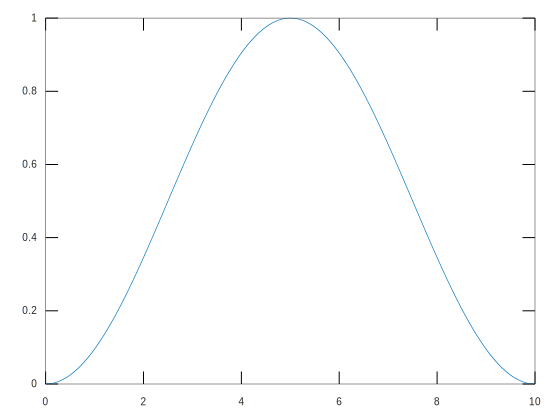

In [14]:
RC = (1 - cos(2*pi*T/period))/2;
plot(T, RC);

In [15]:
# Freq = 400:4:400+4*(rows(VA3TYB_A_s)-1);
fcLow = 200;
fcHigh = 2600;
fcLowP = fcLow/2;
fcHighP = fcHigh * 2;
freqInterval = fcHighP - fcLowP;
freqIntervals = freqInterval/4;
Freq = fcLowP:freqInterval/freqIntervals:fcHighP;

In [16]:
cosArg = 2*pi*Freq';
tic = time();
Sig = arrayfun(@(t) sum(cos(cosArg*t)), T);
printf("toc: %d seconds", time() - tic)

toc: 7.96212 seconds

ans =  1276


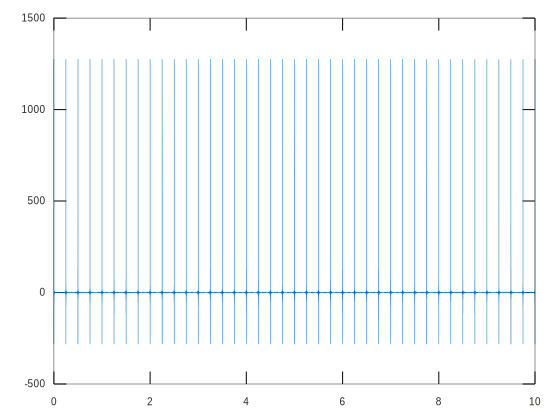

In [17]:
max(abs(Sig))
# A_s' * A_s
plot(T, Sig)

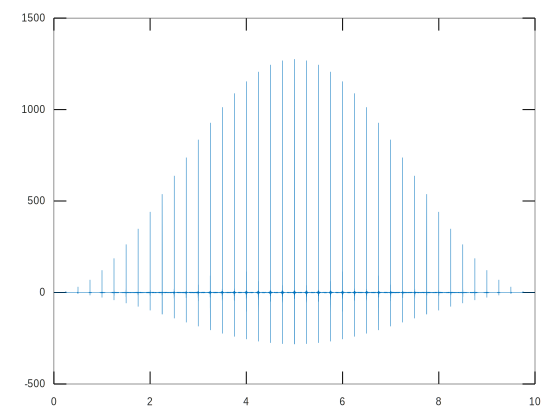

In [21]:
SigPulse = RC .* Sig;
plot(T, SigPulse)

In [22]:
E_cos_pulse = fftshift(fft(SigPulse, sample_rate*period*10 + 1));
# E_cos_pulse = fftshift(fft(RC .* Sig));
F_base = linspace(-sample_rate/2, sample_rate/2, columns(E_cos_pulse));

In [23]:
plot(F_base, E_cos_pulse)
grid on
grid minor
# axis([1000-10 1000+10], "tic")

In [24]:
max(SigPulse)
min(SigPulse)

ans =  1276
ans = -282.29


In [25]:
audiowrite("calibrate.wav", SigPulse ./ max(SigPulse), sample_rate, 
"Title", "Calibration file for Yaesu radioes.",
"Artist", "Terry Bondy, VA3TYB")

In [26]:
audioinfo("calibrate.wav")

ans =

  scalar structure containing the fields:

    Filename = calibrate.wav
    CompressionMethod = 
    NumChannels =  1
    SampleRate =  16000
    TotalSamples =  160001
    Duration =  10.000
    BitsPerSample =  16
    BitRate = -1
    Title = Calibration file for Yaesu radioes.
    Artist = Terry Bondy, VA3TYB
    Comment = 



In [27]:
[Sigread, fs] = audioread("calibrate.wav");

In [28]:
fs


fs =  16000


In [29]:
columns(Sigread)

ans =  1


In [30]:
rows(Sigread)

ans =  160001


In [31]:
columns(T)

ans =  160001


In [32]:
max(Sigread)

ans =  0.99997


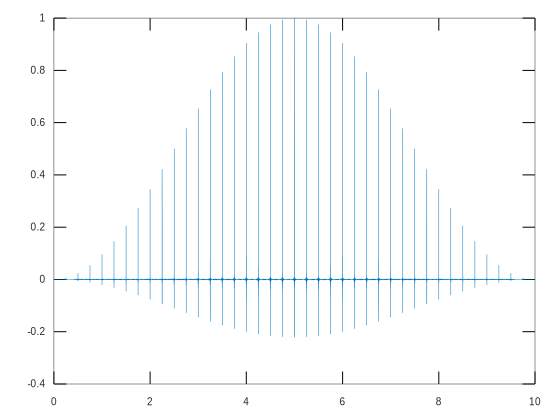

In [33]:
plot(T, Sigread)